# Project: Wrangling and Analyze Data

## by Eric Anku

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Import twitter archive enhanced dataset
df_1 = pd.read_csv("data/twitter_archive_enhanced.csv")

# View first five rows
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Url for image prediction file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Get url using requests library
response = requests.get(url)

# Open and write file into local directory
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
# Read image prediction file
df_2 = pd.read_csv("image_predictions.tsv", sep='\t')

# View first five rows of the dataset
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.tweepyError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Initialise empty dataframe
df_3 = []

# Loop through the json file and select `tweet_id`, `retweet_count`,`favorite_count` and `retweet` 
with open("data/tweet-json.txt", "r") as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet["id"] # Tweet id
        retweet_count = tweet["retweet_count"] # Count on retweet
        favorite_count = tweet["favorite_count"] # Favourite count
        retweeted = tweet["retweeted"] # Retweeted
        # Add columns to empty df_3 list as a dictionary
        df_3.append({
            "tweet_id": tweet_id,
            "retweet_count": retweet_count,
            "favorite_count": favorite_count,
        "retweeted": retweeted})
        
# Convert to pandas data frame with dictionary created above
df_tweets = pd.DataFrame(df_3, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted"])

# Inspect the dataframe using a random sample
df_tweets.sample(10)

,tweet_id,retweet_count,favorite_count,retweeted
699,786233965241827333,5571,17178,False
379,827600520311402496,1082,8143,False
1387,700167517596164096,836,2903,False
865,761976711479193600,2310,5992,False
494,813172488309972993,2236,10384,False
1255,710296729921429505,833,2574,False
206,852553447878664193,3885,17492,False
1302,707411934438625280,673,2486,False
2183,668986018524233728,183,578,False
1397,699691744225525762,5174,11252,False


## Assessing Data

### Visual Assessment

In [6]:
# Visual assessment of "twitter_arhive_enhanced.csv"
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# Visual assessment of "image_predictions.tsv"
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# Visual assessment of "tweet-json.txt file from Twitter API"
df_tweets

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
...,...,...,...,...
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False


### Programmatic assessment

In [9]:
# Info for dataframe: "twitter_arhive_enhanced.csv"
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Info for dataframe: "image predictions.tsv"
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# Info for dataframe: Selected columns ["tweet_id", "retweet_count", "favorite_count", "retweeted"] from "tweet-json.txt"
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


In [12]:
# View fist five rows of df_1
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
# View last five rows
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
# View first rows of image predictions dataset
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# View last five rows of image prediction dataset
df_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
# Unique values in the source variable of twitter_archive_enhanced
df_1["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [17]:
# View first five rows of tweet json dataset
df_tweets.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


In [18]:
# View last five rows of the tweet json dataset
df_tweets.tail()

,tweet_id,retweet_count,favorite_count,retweeted
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False
2353,666020888022790149,532,2535,False


### Quality issues

1. Retweets inside twitter_archive_enhaced dataframe.

2. Missing data in twitter_archive_enhanced dataframe [`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,`retweeted_status_user_id`, `retweeted_status_timestamp`].

3. `tweet_id` from twitter_archived_enhanced, image_predictions and tweet_json dataframes are int instead of object datatype.

4. Image predictions (`p1_dog`, `p2_dog`, `p3_dog`) in image_prediction dataset are not all dog names.

5. `source` column in twitter_archived_enhanced dataframe contains html tags with values.

6. `p1`, `p2`, `p3` have inconsistent cases for names of dogs in image_predictions dataframe.

7. `doggo`, `floffer`, `pupper`, `puppo` have data with no values.

8. `name` for some dogs in twitter_archived_enhanced are unlikely.

9.  Redundant columns.

### Tidiness issues

10.  `doggo`, `floffer`, `pupper`, and `puppo` have similar data values

11. `tweet_id` is present in all three data frames

## Cleaning Data

In [19]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_tweets.copy()

### Issue #1: Retweets inside twitter_archive_enhanced dataframe

#### Define: Remove retweets from twitter_archove_enhanced dataframe

#### Code

In [20]:
# Remove retweets
df_1_clean = df_1_clean[pd.isnull(df_1_clean.retweeted_status_id)]
df_1_clean = df_1_clean[pd.isnull(df_1_clean.in_reply_to_status_id)]

#### Test

In [21]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Missing data in twitter_archive_enhanced dataframe (df_1) [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp]

#### Define: Remove columns with missing data

#### Code

In [22]:
# List of columns
columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", 
           "retweeted_status_timestamp"]

# Drop columns
df_1_clean.drop(columns = columns, inplace = True)

#### Test

In [23]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: `tweet_id` from twitter_archived_enhanced, image_predictions and tweet_json dataframes are int instead of object datatype

#### Define: Convert `tweet_id` from twitter_archived_enhanced, image_predictions and tweet_json dataframes into object datatype

#### Code

In [24]:
df_1_clean["tweet_id"] = df_1_clean["tweet_id"].astype("object")
df_2_clean["tweet_id"] = df_2_clean["tweet_id"].astype("object")
df_3_clean["tweet_id"] = df_3_clean["tweet_id"].astype("object")

#### Test

In [25]:
print(df_1_clean["tweet_id"].dtype)
print(df_2_clean["tweet_id"].dtype)
df_3_clean["tweet_id"].dtype

object
object


dtype('O')

### Issue #4:  Name entries in image prediction dataset are not all dog names.

#### Define: Remove image prediction that are not dogs.

#### Code

In [26]:
# Retain dogs as predicted inside image prediction dataframe
df_2_clean = df_2_clean[(df_2_clean["p1_dog"] == True) &
             (df_2_clean["p2_dog"] == True) &
             (df_2_clean["p3_dog"] == True)]

#### Test

In [27]:
# Confirm unique values 
print(df_2_clean["p1_dog"].unique())
print(df_2_clean["p2_dog"].unique())
df_2_clean["p3_dog"].unique()

[ True]
[ True]


array([ True])

### Issue #5: `source` column in twitter_archived_enhanced dataframe contains html tags with values.

#### Define: Extract value from `source`

#### Code

In [28]:
df_1_clean["source"] = df_1_clean["source"].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "Twitter for iPhone").str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Twitter Web Client").str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Vine-Make a Scene").str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', "TweetDeck")

#### Test

In [29]:
df_1_clean["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine-Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #6:  `p1`, `p2`, `p3` have inconsistent cases for names of dogs in image_predictions dataframe.

#### Define: Capitalise dog names in `p1`, `p2`, `p3` and remove underscores

#### Code

In [30]:
# Use sentence case and remove underscores in names

df_2_clean["p1"] = df_2_clean["p1"].str.capitalize().str.replace("_", " ")

df_2_clean["p2"] = df_2_clean["p2"].str.capitalize().str.replace("_", " ")

df_2_clean["p3"] = df_2_clean["p3"].str.capitalize().str.replace("_", " ")

#### Test

In [31]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #10: doggo, floffer, pupper, and puppo have similar data values in twitter_archived_enhanced dataframe

#### Define: Melt rows into a single column in twitter_archived dataframe

#### Code

In [32]:
df_1_clean = pd.melt(df_1_clean, id_vars = ["tweet_id", "timestamp", "source", "text", "expanded_urls", "rating_numerator", "rating_denominator",
                             "name"], var_name = "dog_stage", value_name = "value", value_vars = ["doggo", "floofer", "pupper", "puppo"])

#### Test

In [33]:
print(df_1_clean["dog_stage"].unique())
df_1_clean.head()

['doggo' 'floofer' 'pupper' 'puppo']


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None


In [34]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            8388 non-null   object
 1   timestamp           8388 non-null   object
 2   source              8388 non-null   object
 3   text                8388 non-null   object
 4   expanded_urls       8376 non-null   object
 5   rating_numerator    8388 non-null   int64 
 6   rating_denominator  8388 non-null   int64 
 7   name                8388 non-null   object
 8   dog_stage           8388 non-null   object
 9   value               8388 non-null   object
dtypes: int64(2), object(8)
memory usage: 655.4+ KB


### Issue #8: `doggo`, `floffer`, `pupper`, `puppo` have data with no values.

#### Define: Convert None inside variables to nan and drop values with nan

#### Code

In [35]:
df_1_clean["value"] = df_1_clean["value"].replace("None", np.nan)

#### Test

In [36]:
df_1_clean["value"].unique()

array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [37]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            8388 non-null   object
 1   timestamp           8388 non-null   object
 2   source              8388 non-null   object
 3   text                8388 non-null   object
 4   expanded_urls       8376 non-null   object
 5   rating_numerator    8388 non-null   int64 
 6   rating_denominator  8388 non-null   int64 
 7   name                8388 non-null   object
 8   dog_stage           8388 non-null   object
 9   value               347 non-null    object
dtypes: int64(2), object(8)
memory usage: 655.4+ KB


### Issue #8: `name` for some dogs in twitter_archived_enhanced are unlikely.

#### Define: Convert unlikely names into nan and drop nan

#### Code

In [38]:
df_1_clean["name"][df_1_clean["name"].str.match('[a-z]+')] = "None"
name_values = ["None"]
df_1_clean["name"] = df_1_clean["name"].replace(name_values, np.nan)
df_1_clean.dropna(subset = "name", inplace = True)

#### Test

In [39]:
df_1_clean["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
     

In [40]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5560 entries, 0 to 8357
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            5560 non-null   object
 1   timestamp           5560 non-null   object
 2   source              5560 non-null   object
 3   text                5560 non-null   object
 4   expanded_urls       5560 non-null   object
 5   rating_numerator    5560 non-null   int64 
 6   rating_denominator  5560 non-null   int64 
 7   name                5560 non-null   object
 8   dog_stage           5560 non-null   object
 9   value               188 non-null    object
dtypes: int64(2), object(8)
memory usage: 477.8+ KB


### Issue #11: `tweet_id` is present in all three data frames

#### Define: Merge dataframes with tweet_id as key

#### Code

In [41]:
df_combined = pd.merge(df_1_clean, df_2_clean,
                      on = "tweet_id",
                      how = "left")

In [42]:
df_combined_two = pd.merge(df_combined, df_3_clean,
                          on = "tweet_id",
                          how = "left")

#### Test

In [43]:
df_combined_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5560 entries, 0 to 5559
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5560 non-null   object 
 1   timestamp           5560 non-null   object 
 2   source              5560 non-null   object 
 3   text                5560 non-null   object 
 4   expanded_urls       5560 non-null   object 
 5   rating_numerator    5560 non-null   int64  
 6   rating_denominator  5560 non-null   int64  
 7   name                5560 non-null   object 
 8   dog_stage           5560 non-null   object 
 9   value               188 non-null    object 
 10  jpg_url             3408 non-null   object 
 11  img_num             3408 non-null   float64
 12  p1                  3408 non-null   object 
 13  p1_conf             3408 non-null   float64
 14  p1_dog              3408 non-null   object 
 15  p2                  3408 non-null   object 
 16  p2_con

### Issue #9: Redundant columns.

#### Define: Drop redundant columns

#### Code

In [44]:
# # Remove null values
# df_combined_two = df_combined_two[pd.isnull(df_combined_two.p1)]
# Drop columns
columns_drop = ["timestamp", "text", "expanded_urls", "img_num", "value", "jpg_url", "p1", "p1_conf", "p1_dog",  "p2", "p2_conf", "p2_dog",
                "p3", "p3_conf", "p3_dog"]
df_combined_two.drop(columns = columns_drop, axis = 1, inplace = True)

#### Test

In [45]:
df_combined_two.head()

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,retweeted
0,892420643555336193,Twitter for iPhone,13,10,Phineas,doggo,8853,39467,False
1,892177421306343426,Twitter for iPhone,13,10,Tilly,doggo,6514,33819,False
2,891815181378084864,Twitter for iPhone,12,10,Archie,doggo,4328,25461,False
3,891689557279858688,Twitter for iPhone,13,10,Darla,doggo,8964,42908,False
4,891327558926688256,Twitter for iPhone,12,10,Franklin,doggo,9774,41048,False


In [46]:
df_combined_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5560 entries, 0 to 5559
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            5560 non-null   object
 1   source              5560 non-null   object
 2   rating_numerator    5560 non-null   int64 
 3   rating_denominator  5560 non-null   int64 
 4   name                5560 non-null   object
 5   dog_stage           5560 non-null   object
 6   retweet_count       5560 non-null   int64 
 7   favorite_count      5560 non-null   int64 
 8   retweeted           5560 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 396.4+ KB


## Storing Data

In [47]:
df_combined_two.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data

In [48]:
# Source of tweets
df_combined_two["source"].value_counts()

Twitter for iPhone    5296
Vine-Make a Scene      164
Twitter Web Client      64
TweetDeck               36
Name: source, dtype: int64

In [49]:
# Frequency of dog names
df_combined_two["name"].value_counts()

Charlie       44
Lucy          44
Oliver        40
Cooper        40
Penny         36
              ..
Shelby         4
Sephie         4
Bonaparte      4
Wishes         4
Christoper     4
Name: name, Length: 929, dtype: int64

In [50]:
# Frequency of dog stage
df_combined_two.rating_numerator.mean()

12.092805755395684

### Insights:
1. Majority of tweets were from Iphones.

2. Lucy and Charlie are the most common dog names.

3. The average rating of dog was 12.09.

3. Less frequent dog names include Rose, Aubie, Kota, Leela, Glenn, Shelby, Sephie, Bonaparte, Wishes, Christopher.

### Visualization

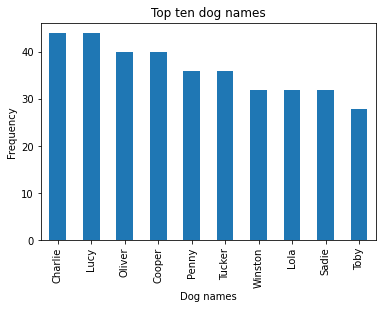

In [51]:
# Bar chart of dog names- first ten
df_combined_two["name"].value_counts()[0:10].plot(kind = "bar")
plt.title("Top ten dog names")
plt.xlabel("Dog names")
plt.ylabel("Frequency");

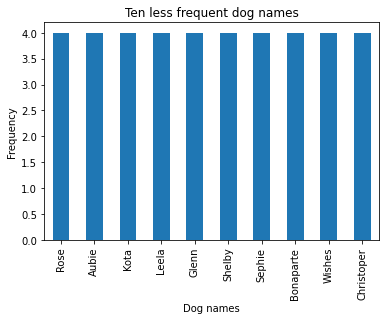

In [52]:
# Bar chart of dog names- last ten
df_combined_two["name"].value_counts()[-10:].plot(kind = "bar")
plt.title("Ten less frequent dog names")
plt.xlabel("Dog names")
plt.ylabel("Frequency");